### Desision Tree

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

seed = 42

## Training and visualizing

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
print('Features used',iris.feature_names[2:])
X = iris.data[:,2:]
y = iris.target

np.max(X)

Features used ['petal length (cm)', 'petal width (cm)']


6.9

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=seed)
tree_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

### Plot decision tree

In [4]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tree_clf,out_file=None,
    feature_names = iris.feature_names[2:],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)

graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [5]:
1-(45/46)**2-(1/46)**2 # Gini 
1- (1/3)**2 *3 # Gini petal length 

0.6666666666666667

### Decision boundary

Text(4.05,0.5,'(Depth=2)')

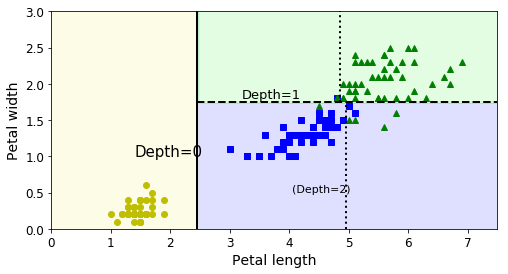

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes = [0, 7.5, 0, 3], iris =True, legend=False, plot_training = True):
    x1s = np.linspace(axes[0],axes[1], 100)
    x2s = np.linspace(axes[2],axes[3], 100)
    x1,x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    
    plt.contourf(x1,x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contourf(x1,x2,y_pred, alpha=0.3, cmap=custom_cmap2)
    if plot_training:
        plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Iris-Setosa')
        plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:,0][y==2], X[:,1][y==2], 'g^', label='Iris-Virginica')
    if iris:
        plt.xlabel('Petal length', fontsize=14)
        plt.ylabel('Petal width', fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=14)
        plt.ylabel(r'$X_2$', fontsize=14)
    if legend:
        plt.legend(loc='lower right', fontsize=14)
        
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf,X,y)
plt.plot([2.45,2.45],[0,3], 'k-',linewidth=2)
plt.plot([2.45,7.5],[1.75,1.75], 'k--', linewidth=2)
plt.plot([4.95,4.95],[0,1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

In [7]:
tree_clf.predict([[5,1.5]]),tree_clf.predict_proba([[5,1.5]])

(array([1]), array([[0.        , 0.90740741, 0.09259259]]))

# Sensitivity to training set details

In [8]:
X[(X[:,1] == X[:,1][y==1].max()) & (y==1)] # widest iris versicolor flower

array([[4.8, 1.8]])

In [9]:
not_widest_versicolor = (X[:,1]!=1.8) | (y==2)
X_tweaked =  X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2,random_state=40)
tree_clf_tweaked.fit(X_tweaked,y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')

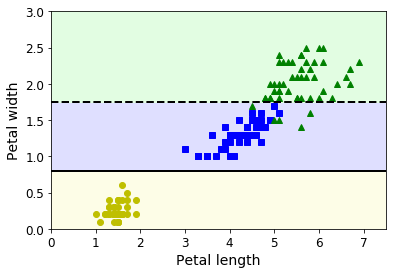

In [10]:
plt.plot(figsize=(10,4))
plot_decision_boundary(tree_clf_tweaked,X_tweaked,y_tweaked)
plt.plot([0,7.5], [0.8, 0.8], 'k-', linewidth=2)
plt.plot([0,7.5], [1.75,1.75],'k--', linewidth=2)

Text(0.5,1,'Min samples leaf =4')

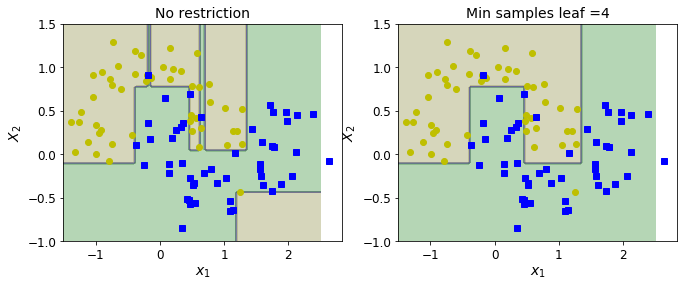

In [11]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, random_state=53,noise=0.25)
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,random_state= seed)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1,Xm,ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('No restriction',fontsize=14)

plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym,axes=[-1.5, 2.5, -1, 1.5], iris= False)
plt.title('Min samples leaf ={}'.format(deep_tree_clf2.min_samples_leaf),fontsize=14)


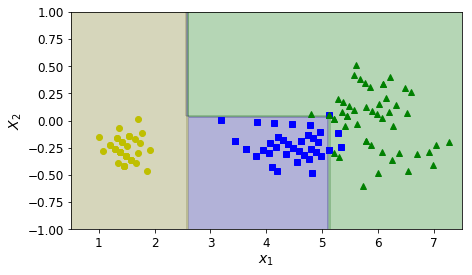

In [12]:
angle = np.pi / 180 *20
rotation_matrix = np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(7,4))
plot_decision_boundary(tree_clf_r, Xr, y,axes=[0.5,7.5,-1.0, 1],iris=False)


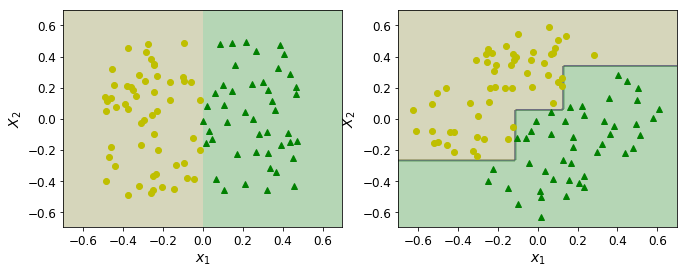

In [13]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:,0] >0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

### Regresion Tree

In [14]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=seed)
tree_reg.fit(X,y)

dot_data = export_graphviz(tree_reg, out_file=None, 
                          filled=True,rounded=True)
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state= seed, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state= seed, max_depth=3)
tree_reg1.fit(X,y)
tree_reg2.fit(X,y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")



In [17]:
plot_regression_prediction(tree_reg1,X,y)

NameError: name 'plot_regression_prediction' is not defined